# **1. Load data**

In [ ]:
# Install Kaggle API
!pip install --quiet kaggle

import os
if '.kaggle' not in os.listdir('/root'):
    !mkdir ~/.kaggle

# !mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/

!chmod 600 /root/.kaggle/kaggle.json

# Get the dataset
!kaggle competitions download -c ashrae-energy-prediction

  0% 0.00/1.27M [00:00<?, ?B/s]
100% 1.27M/1.27M [00:00<00:00, 88.2MB/s]
100% 167M/167M [00:01<00:00, 150MB/s]

  0% 0.00/44.5k [00:00<?, ?B/s]
100% 44.5k/44.5k [00:00<00:00, 45.1MB/s]
 93% 82.0M/88.4M [00:00<00:00, 138MB/s]
100% 88.4M/88.4M [00:00<00:00, 139MB/s]
 95% 114M/120M [00:00<00:00, 145MB/s] 
100% 120M/120M [00:00<00:00, 163MB/s]
  0% 0.00/2.53M [00:00<?, ?B/s]
100% 2.53M/2.53M [00:00<00:00, 170MB/s]


In [ ]:

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import  pickle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import SGDRegressor
from sklearn.metrics import  mean_absolute_error
import gc
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras import backend as K
import datetime
from sklearn.preprocessing import LabelEncoder
import keras
import tensorflow as tf
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

import matplotlib as mpl
import seaborn as sns
from google.colab import drive
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
weather = pd.read_csv('/content/weather_train.csv.zip')
metre = pd.read_csv('/content/train.csv.zip')
building = pd.read_csv('/content/building_metadata.csv')



In [ ]:
metre.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [ ]:

# n, bins, batches  = plt.hist(x= train["meter_reading"], bins="auto", color = '#0504aa')
# plt.grid(axis ="y")
# plt.xlabel("meter_reading")
# plt.ylabel("count")
# plt.title("Sale Price distribution")

In [ ]:
weather

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6


In [ ]:
building

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN


In [ ]:
building["primary_use"].value_counts()

Education                        549
Office                           279
Entertainment/public assembly    184
Public services                  156
Lodging/residential              147
Other                             25
Healthcare                        23
Parking                           22
Warehouse/storage                 13
Manufacturing/industrial          12
Retail                            11
Services                          10
Technology/science                 6
Food sales and service             5
Utility                            4
Religious worship                  3
Name: primary_use, dtype: int64

# **2. Data exploration and visualization**>>MORE

## **Check** for duplicates

In [ ]:
metre[metre.duplicated()]

,building_id,meter,timestamp,meter_reading


## Visualize variables
- per site

# Explore and Fill NA's

In [ ]:
metre.isnull().sum() /metre.shape[0]

building_id      0.0
meter            0.0
timestamp        0.0
meter_reading    0.0
dtype: float64

In [ ]:
building.isnull().sum()/ building.shape[0] 

site_id        0.000000
building_id    0.000000
primary_use    0.000000
square_feet    0.000000
year_built     0.534161
floor_count    0.755003
dtype: float64

In [ ]:
building.drop(["floor_count", "year_built"], axis=1, inplace=True)

In [ ]:
weather.isnull().sum()/ weather.shape[0] 

site_id               0.000000
timestamp             0.000000
air_temperature       0.000393
cloud_coverage        0.494895
dew_temperature       0.000808
precip_depth_1_hr     0.359791
sea_level_pressure    0.075966
wind_direction        0.044844
wind_speed            0.002175
dtype: float64

## Weather:  NA's exploration

In [ ]:
#cumulative difference; group by site
cum_air=[]
cum_air.append(0)
n= weather[weather["air_temperature"].isnull()].index.shape[0]
for i in range(1,n):
  cum_air.append(weather[weather["air_temperature"].isnull()].index[i] - weather[weather["air_temperature"].isnull()].index[i-1])


In [ ]:
cum_air

In [ ]:
weather[weather["cloud_coverage"].isnull()]["site_id"].value_counts()

11    8614
7     8614
1     7062
5     6030
15    4399
13    4298
4     4230
8     3830
0     3830
3     3642
9     3458
14    3311
6     2992
10    2450
2     2354
12      59
Name: site_id, dtype: int64

In [ ]:
weather["cloud_coverage"].value_counts()

0.0    33871
2.0    13585
4.0    10241
8.0     3531
6.0     3521
7.0     3485
1.0      713
3.0      608
5.0      526
9.0      519
Name: cloud_coverage, dtype: int64

In [ ]:
weather.groupby('site_id').mean()

,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
site_id,,,,,,,
0,22.836021,3.044610,16.817880,1.382557,1017.988378,156.494024,3.375114
1,11.711801,0.084656,7.646473,NaN,1015.989795,195.584475,3.967043
2,24.940321,1.958469,4.069506,0.157738,1011.679311,152.777100,2.932764
3,15.520579,3.879136,8.126214,0.691868,1017.938692,185.063174,3.910893
4,15.236366,1.867999,9.894750,0.248594,1016.887750,207.864715,3.858226
5,10.867931,0.290642,8.194676,NaN,NaN,200.053191,4.768087
6,15.141678,0.647668,7.320691,0.797768,1017.527954,131.618143,2.197758
7,7.888867,NaN,1.905913,11.350205,1015.252010,208.931739,3.445565
8,22.836021,3.044610,16.817880,1.382557,1017.988378,156.494024,3.375114


 we don't have any data for cloud_coverage in site_id 7 and 11. and so many other examples. We use the site_id mean  for imputation.
 we could drop site 5 since it's missing both percep and air(but won't do it for now)

In [ ]:

weather[weather["site_id"]==0]["cloud_coverage"].value_counts()

4.0    1672
2.0    1630
0.0     880
6.0     529
8.0     226
9.0      17
Name: cloud_coverage, dtype: int64

In [ ]:

weather[weather["cloud_coverage"].isnull()==False]

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
6,0,2016-01-01 06:00:00,21.1,6.0,21.1,-1.0,1019.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...
139709,15,2016-12-29 08:00:00,-2.8,0.0,-5.6,NaN,1012.9,140.0,5.7
139729,15,2016-12-30 04:00:00,-1.7,0.0,-5.0,NaN,1001.0,250.0,3.1
139764,15,2016-12-31 15:00:00,-1.7,4.0,-7.2,NaN,1012.3,160.0,6.7
139765,15,2016-12-31 16:00:00,-0.6,0.0,-6.7,NaN,1011.1,170.0,7.2


In [ ]:
weather[weather["dew_temperature"].isnull()].head(30) 

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
368,0,2016-01-16 08:00:00,NaN,NaN,NaN,0.0,NaN,180.0,1.5
369,0,2016-01-16 09:00:00,NaN,2.0,NaN,0.0,NaN,190.0,1.5
370,0,2016-01-16 10:00:00,NaN,2.0,NaN,0.0,NaN,190.0,1.5
15763,1,2016-10-18 13:00:00,NaN,NaN,NaN,NaN,NaN,290.0,6.2
22349,2,2016-07-19 02:00:00,NaN,NaN,NaN,86.0,NaN,NaN,NaN
27393,3,2016-02-14 07:00:00,NaN,0.0,NaN,0.0,NaN,NaN,NaN
28720,3,2016-04-09 14:00:00,3.9,NaN,NaN,2.0,NaN,290.0,5.7
30910,3,2016-07-09 20:00:00,NaN,NaN,NaN,38.0,NaN,NaN,NaN
30911,3,2016-07-09 21:00:00,NaN,NaN,NaN,8.0,NaN,NaN,NaN
30914,3,2016-07-10 00:00:00,NaN,4.0,NaN,NaN,NaN,NaN,NaN


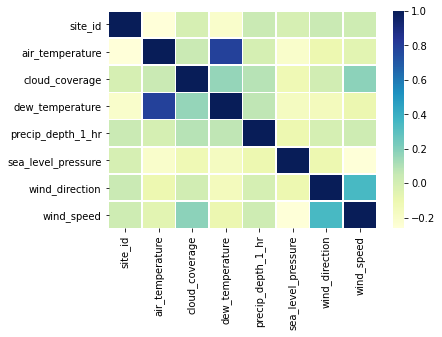

In [ ]:

sns.heatmap(weather_train_f.corr(), linewidths = 0.5, cmap = "YlGnBu")

There's a strong corr. between dew_temp and air_temp>> drop 1 of them if using linear reg.

## Weather; Flling NA's

When filling the missing weather data, using previous or future measurements can be good provided they are not too far in the future or past. **We will start with forward/back filling weather data up to 24 hours for each site.**

In [ ]:
#Forward filling missing data in the weather dataset +-24 hours
#Train weather
weather_train_f = weather.copy()
weather_train_f["timestamp"] = pd.to_datetime(weather_train_f["timestamp"])
weather_train_f = weather_train_f.sort_values(by = ["site_id", "timestamp"])

weather_train_f.fillna(method= "ffill", inplace=True, limit=12)
weather_train_f.fillna(method = "bfill", inplace=True, limit=12)

#same for test

In [ ]:
weather_train_f["cloud_coverage"].head()

0    6.0
1    6.0
2    2.0
3    2.0
4    2.0
Name: cloud_coverage, dtype: float64

precip_depth is a dynamically changing column; forward filling wouldn't make any sense.???

to save memory

In [ ]:
del weather

In [ ]:
weather_train_f.isnull().sum()/weather_train_f.shape[0]

site_id               0.000000
timestamp             0.000000
air_temperature       0.000000
cloud_coverage        0.181752
dew_temperature       0.000000
precip_depth_1_hr     0.287352
sea_level_pressure    0.063224
wind_direction        0.000000
wind_speed            0.000000
dtype: float64



As seen above, there are still blocks of data missing over long periods of time. For these we will fill with the mean values for the given site.


In [ ]:
weather_train_f[weather_train_f["site_id"]==7]

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
61430,7,2016-01-01 00:00:00,-1.8,0.0,-3.2,0.0,1016.0,280.0,1.5
61431,7,2016-01-01 01:00:00,-1.7,0.0,-2.8,0.0,1016.1,260.0,1.0
61432,7,2016-01-01 02:00:00,-2.7,0.0,-3.3,0.0,1015.8,350.0,0.5
61433,7,2016-01-01 03:00:00,-2.3,0.0,-3.2,0.0,1015.4,280.0,1.5
61434,7,2016-01-01 04:00:00,-2.6,0.0,-3.3,0.0,1015.1,310.0,2.1
...,...,...,...,...,...,...,...,...,...
70039,7,2016-12-31 19:00:00,-10.3,6.0,-11.9,2.0,1007.2,70.0,5.1
70040,7,2016-12-31 20:00:00,-9.9,6.0,-11.5,2.0,1006.3,70.0,5.7
70041,7,2016-12-31 21:00:00,-9.9,6.0,-11.5,2.0,1005.8,70.0,5.1
70042,7,2016-12-31 22:00:00,-9.8,6.0,-11.1,3.0,1005.3,60.0,5.1


**cloud_coverage still has lots of contigous missing values; if filling with mean per cite, ana keda ha-fill values kteera awy be nafs el value!**

Sol; for site 7 and  11;  fill with   a single number. 
For other sites fill with mean per day(rounded,since cloud_coverage only takes discrete values between 0 and 9)

filling with the average of the day will give more diverse values?

In [ ]:
weather_train_f["day"] = weather_train_f["timestamp"].dt.day

In [ ]:
weather_train_f.isnull().sum() /weather_train_f.shape[0] *100

site_id                0.000000
timestamp              0.000000
air_temperature        0.000000
cloud_coverage        18.175184
dew_temperature        0.000000
precip_depth_1_hr     28.735163
sea_level_pressure     6.322394
wind_direction         0.000000
wind_speed             0.000000
day                    0.000000
dtype: float64

In [ ]:
round(weather_train_f.groupby(["site_id","day"]).mean())

air_temperature  cloud_coverage  ...  wind_direction  wind_speed
site_id day                                   ...                            
0       1               24.0             5.0  ...           132.0         3.0
        2               24.0             4.0  ...           154.0         4.0
        3               23.0             5.0  ...           172.0         4.0
        4               23.0             5.0  ...           175.0         3.0
        5               22.0             3.0  ...           187.0         4.0
...                      ...             ...  ...             ...         ...
15      27              10.0             2.0  ...           179.0         4.0
        28              11.0             2.0  ...           157.0         4.0
        29              11.0             2.0  ...           185.0         4.0
        30              11.0             1.0  ...           157.0         3.0
        31              12.0             2.0  ...           171.0         4.0

[496 rows x 7 columns]

In [ ]:
#Train data

fill_lib = round(weather_train_f.groupby(["site_id","day"])["cloud_coverage"].transform("mean") )
weather_train_f["cloud_coverage"].fillna(fill_lib, inplace=True)

#mean of day, per site id
#Test data


In [ ]:


missing_cols = [col for col in weather_train_f.columns if weather_train_f[col].isna().any()  and col!=   "cloud_coverage"]
fill_lib = weather_train_f.groupby(["site_id","day"])[missing_cols].transform("mean") 
weather_train_f.fillna(fill_lib, inplace=True)

#mean of site id, mean of day
#Test data


In [ ]:
del fill_lib

In [ ]:
weather_train_f.isnull().sum() /weather_train_f.shape[0] *100

site_id                0.000000
timestamp              0.000000
air_temperature        0.000000
cloud_coverage        11.686091
dew_temperature        0.000000
precip_depth_1_hr     17.818892
sea_level_pressure     5.938200
wind_direction         0.000000
wind_speed             0.000000
day                    0.000000
dtype: float64

In [ ]:
weather_train_f.head(30)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,day
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,-1.0,1019.7,0.0,0.0,1
1,0,2016-01-01 01:00:00,24.4,6.0,21.1,-1.0,1020.2,70.0,1.5,1
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0,1
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0,1
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6,1
5,0,2016-01-01 05:00:00,19.4,2.0,19.4,0.0,1020.0,0.0,0.0,1
6,0,2016-01-01 06:00:00,21.1,6.0,21.1,-1.0,1019.4,0.0,0.0,1
7,0,2016-01-01 07:00:00,21.1,6.0,21.1,0.0,1018.8,210.0,1.5,1
8,0,2016-01-01 08:00:00,20.6,6.0,20.0,0.0,1018.1,0.0,0.0,1
9,0,2016-01-01 09:00:00,21.1,6.0,20.6,0.0,1019.0,290.0,1.5,1


**There are still some missing values. Finally, for those cells which are missing during the entire day, fill with the mean of the site_id **

In [ ]:
#Train data

missing_cols = [col for col in weather_train_f.columns if weather_train_f[col].isna().any() ]
fill_lib = weather_train_f.groupby(["site_id"])[missing_cols].transform("mean") 
weather_train_f.fillna(fill_lib, inplace=True)

#mean of site id, mean of day
#Test data


In [ ]:
weather_train_f.isnull().sum()

site_id               0
timestamp             0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
day                   0
dtype: int64

##Putting it all together: Fill NA's for weather

In [ ]:
def fill_na_num_weather(weather_f):
    
    #Forward filling missing data in the weather dataset +-24 hours
   
    weather_f["timestamp"] = pd.to_datetime(weather_f["timestamp"])
    weather_f["day"] = weather_f["timestamp"].dt.day
    weather_f = weather_f.sort_values(by = ["site_id", "timestamp"])

    weather_f.fillna(method= "ffill", inplace=True, limit=12)
    weather_f.fillna(method = "bfill", inplace=True, limit=12)
    # mean per site id, per day
    # for cloud coverage, values must be discrete
    fill_lib = round(weather_f.groupby(["site_id","day"])["cloud_coverage"].transform("mean") )
    weather_f["cloud_coverage"].fillna(fill_lib, inplace=True)
    
    #for other columns
    missing_cols = [col for col in weather_f.columns if weather_f[col].isna().any()  and col!=   "cloud_coverage"]
    fill_lib = weather_f.groupby(["site_id","day"])[missing_cols].transform("mean") 
    weather_f.fillna(fill_lib, inplace=True)

    ##for sites with missing data during day, fill with mean of site
    missing_cols = [col for col in weather_f.columns if weather_f[col].isna().any() ]
    fill_lib = weather_f.groupby(["site_id"])[missing_cols].transform("mean") 
    weather_f.fillna(fill_lib, inplace=True)
    return weather_f
        

In [ ]:
weather_f = fill_na_num_weather(weather)

In [ ]:
weather_f.isna().sum()/ weather_f.shape[0]

site_id               0.0
timestamp             0.0
air_temperature       0.0
cloud_coverage        0.0
dew_temperature       0.0
precip_depth_1_hr     0.0
sea_level_pressure    0.0
wind_direction        0.0
wind_speed            0.0
day                   0.0
dtype: float64

# Merge datasets

In [ ]:
def merge(metre, building, weather_f):
  metre["timestamp"] = pd.to_datetime(metre["timestamp"])
  building.drop(["floor_count", "year_built"], axis=1, inplace=True)
  building_metres = pd.merge(metre, building, how = "left", on="building_id")
  train = pd.merge(building_metres, weather_f, how= "left", on=["site_id", "timestamp"], validate="many_to_one")
  del building
  del metre
  del weather_f
  return train

In [ ]:
train = merge(metre, building, weather_f)

In [ ]:
train.shape

(20216100, 15)

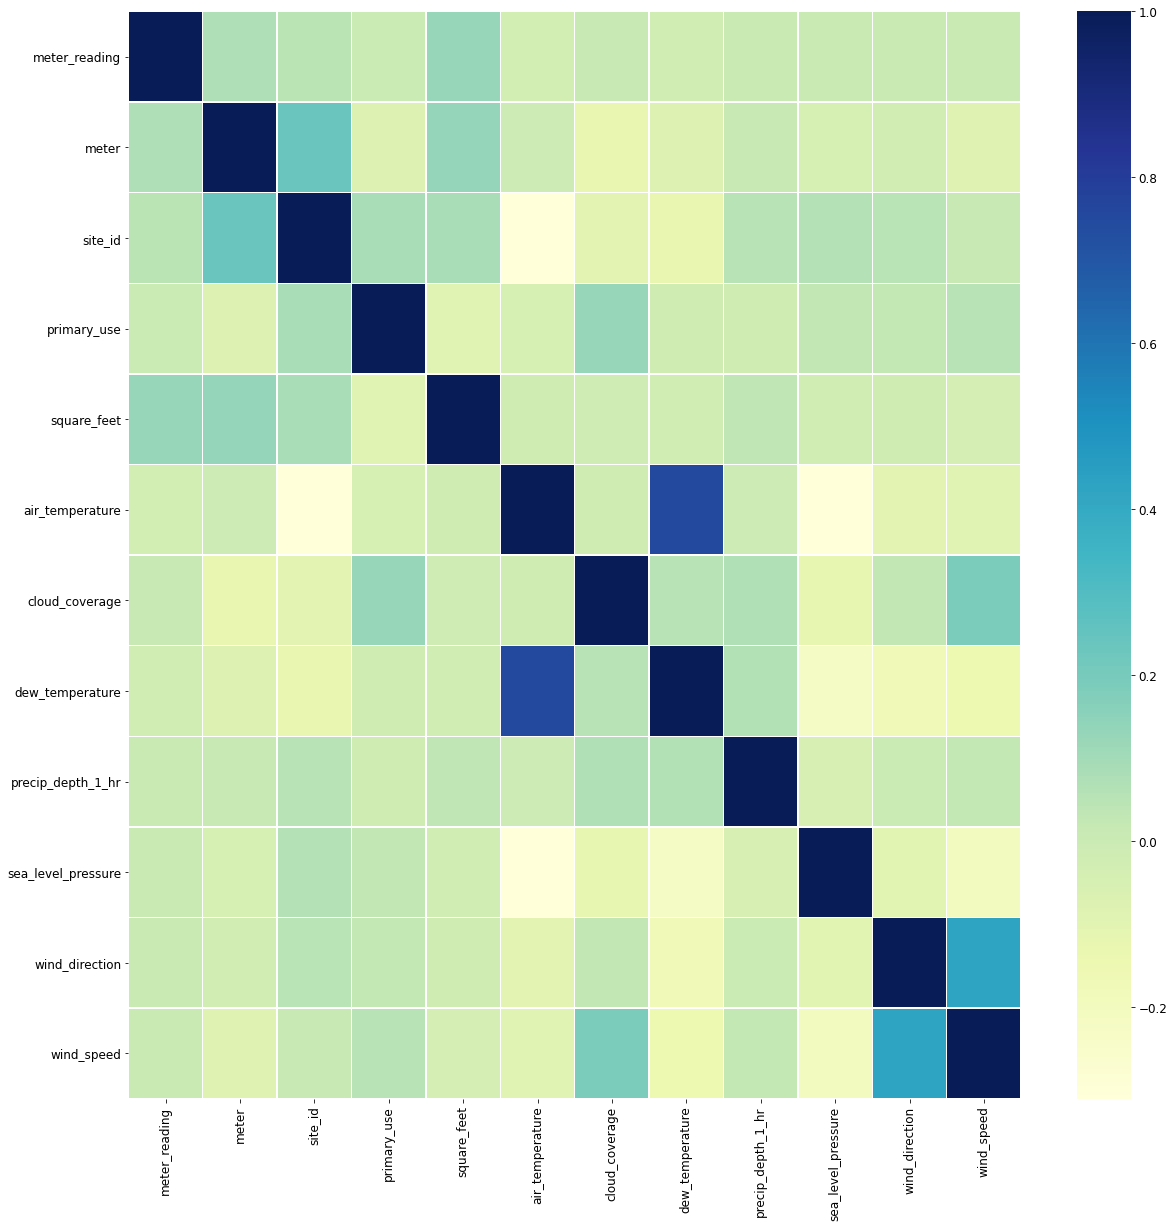

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), linewidths = 0.5, cmap = "YlGnBu")

# Optimize memory usage

In [ ]:

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df



In [ ]:
train = reduce_mem_usage(train)

Mem. usage decreased to 1002.54 Mb (59.4% reduction)


# Check duplicates after merge

In [ ]:
train[train.duplicated()]

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,day


In [ ]:
train.reset_index(drop=True, inplace=True)

In [ ]:
train_m[train_m["air_temperature"].isnull()].head(30)

Looking at building 105, the missing observations lied between 14:00PM untill 17:00PM, since the data isn't entirely missing during the whole day(assuming this is the case for all buildings) it would make sense to use the average of each day, per builidng

In [ ]:
train_m.info()

# Feature engineering; time of day; peak times?

## Extract hour, day, month, year from timestamp

In [ ]:
def add_cols(data):


    #Add hour, time of year, and weekend columns
    data["hour"] = data["timestamp"].dt.hour
    data["day"] = data["timestamp"].dt.day
    data["month"] = data["timestamp"].dt.month
    data["day_of_year"] = (data["timestamp"] - pd.Timestamp("2016-01-01")).dt.days%365
    data["is_weekend"] = data["timestamp"].dt.weekday.isin([5, 6]).astype(int)

    #bucketing hours into 6 buckets: early morning, morning, afternoon, evening, late evening
    data["part_of_day"] = (data["hour"] %24 +4 ) //4
    #Test
    ####
  

In [ ]:
add_cols(train)

In [ ]:
train =reduce_mem_usage(train)

Mem. usage decreased to 1098.94 Mb (41.8% reduction)


# Check NA's after merge

In [ ]:
train.isnull().sum()/train.shape[0]*100

building_id           0.000000
meter                 0.000000
timestamp             0.000000
meter_reading         0.000000
site_id               0.000000
primary_use           0.000000
square_feet           0.000000
air_temperature       0.447638
cloud_coverage        0.447638
dew_temperature       0.447638
precip_depth_1_hr     0.447638
sea_level_pressure    0.447638
wind_direction        0.447638
wind_speed            0.447638
day                   0.447638
dtype: float64

We can now see some additional missing data in the merged datasets from timestamps present in the train/test sets that were not in the weather data. We will forward fill this data for each building.

In [ ]:
train[train["cloud_coverage"].isnull()].head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,day,hour,month,day_of_year,is_weekend,part_of_day
722,565,0,2016-01-01,7.250000,4,Education,15326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,0,1
723,566,0,2016-01-01,0.519000,4,Education,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,0,1
724,569,0,2016-01-01,246.000000,4,Education,86091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,0,1
725,570,0,2016-01-01,79.487999,4,Education,193202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,0,1
726,571,0,2016-01-01,17.000000,4,Education,47954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,0,1


## Merged data; Fill NA's 

In [ ]:
def fill_na_merged(data):
  print(data.head())
  data_s = data.sort_values(by=["building_id", "timestamp"])

  fill_lib = round(data_s.groupby(["building_id","day"])["cloud_coverage"].transform("mean") )
  data_s["cloud_coverage"].fillna(fill_lib, inplace=True)

  missing_cols = [col for col in data_s.columns if data_s[col].isna().any()  and col!= "cloud_coverage"]
  fill_lib = data_s.groupby(["building_id","day"])[missing_cols].transform("mean") 
  data_s.fillna(fill_lib, inplace=True)
  print(data_s.isnull().sum()/data_s.shape[0]*100)
  del fill_lib
  

In [ ]:
fill_na_merged(train)

   building_id  meter  timestamp  ...  day_of_year  is_weekend part_of_day
0            0      0 2016-01-01  ...            0           0           1
1            1      0 2016-01-01  ...            0           0           1
2            2      0 2016-01-01  ...            0           0           1
3            3      0 2016-01-01  ...            0           0           1
4            4      0 2016-01-01  ...            0           0           1

[5 rows x 20 columns]
building_id           0.0
meter                 0.0
timestamp             0.0
meter_reading         0.0
site_id               0.0
primary_use           0.0
square_feet           0.0
air_temperature       0.0
cloud_coverage        0.0
dew_temperature       0.0
precip_depth_1_hr     0.0
sea_level_pressure    0.0
wind_direction        0.0
wind_speed            0.0
day                   0.0
hour                  0.0
month                 0.0
day_of_year           0.0
is_weekend            0.0
part_of_day           0.0
dtype: 

WOHHHHHOOOOOOO!! BYE BYE NULLLLSSSS

In [ ]:
train_m.reset_index(drop=True)

#Zero readings


In [ ]:
zeros = train[train["meter_reading"] == 0].shape[0] / train.shape[0]
print("zero reading percentage:{}".format(round(zeros, 3)))

zero reading percentage:0.093


9% of the reading value is zero.We have the information that some buildings have more than one meter type and we can consider as usage of seasonal energy meters may cause zeros. For example,we don't need to use chilled water at cold days.Likewise,hotwater usage can be change time to time.
But let's dive deeper to understand if this is a normal behavior or not!

Text(0.5, 1.0, 'Meters percentage having zero readings')

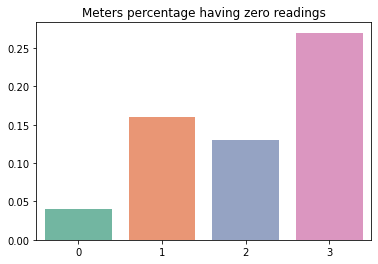

In [ ]:

meter_dict = {}
for i in train["meter"].unique():
    percent = round(train[train['meter_reading']== 0]["meter"].value_counts()[i] /train["meter"].value_counts()[i],2)
    meter_dict[i] = percent
zero_meter = pd.Series(meter_dict)
sns.barplot(x=zero_meter.index, y= zero_meter,palette ="Set2")
plt.title("Meters percentage having zero readings")

In [ ]:
train_m=train.copy()

In [ ]:
train_m.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,day,hour,month,day_of_year,is_weekend,part_of_day
0,0,0,2016-01-01,0.0,0,Education,7432,25.0,6.0,20.0,-1.0,1019.5,0.0,0.0,1,0,1,0,0,1
1,1,0,2016-01-01,0.0,0,Education,2720,25.0,6.0,20.0,-1.0,1019.5,0.0,0.0,1,0,1,0,0,1
2,2,0,2016-01-01,0.0,0,Education,5376,25.0,6.0,20.0,-1.0,1019.5,0.0,0.0,1,0,1,0,0,1
3,3,0,2016-01-01,0.0,0,Education,23685,25.0,6.0,20.0,-1.0,1019.5,0.0,0.0,1,0,1,0,0,1
4,4,0,2016-01-01,0.0,0,Education,116607,25.0,6.0,20.0,-1.0,1019.5,0.0,0.0,1,0,1,0,0,1


In [ ]:
del train

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
train_m[(train_m["site_id"]==0) & (train_m["month"]<= 5)  &(train_m["meter"]==0) & train_m["meter_reading"]!=0  ]

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,day,hour,month,day_of_year,is_weekend,part_of_day
704,0,0,2016-01-30 08:00:00,43.683899,0,Education,7432,8.296875,8.0,6.101562,0.0,1019.0,220.0,2.099609,30,8,1,29,1,3
725,0,0,2016-01-31 05:00:00,37.540798,0,Education,7432,12.796875,8.0,10.000000,0.0,1022.0,0.0,0.000000,31,5,1,30,1,2
737,0,0,2016-01-31 17:00:00,52.557098,0,Education,7432,20.593750,8.0,11.703125,0.0,1021.0,110.0,1.500000,31,17,1,30,1,5
2366,0,0,2016-04-08 14:00:00,59.382702,0,Education,7432,21.703125,2.0,14.398438,0.0,1015.0,250.0,3.099609,8,14,4,98,0,4
2923,0,0,2016-05-01 19:00:00,448.000000,0,Education,7432,31.093750,6.0,17.203125,0.0,1016.0,100.0,4.101562,1,19,5,121,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071521,104,0,2016-05-31 19:00:00,379.502991,0,Office,45330,32.187500,4.0,18.296875,0.0,1013.0,300.0,2.099609,31,19,5,151,0,5
1071522,104,0,2016-05-31 20:00:00,366.535004,0,Office,45330,33.906250,4.0,17.796875,0.0,1012.5,300.0,1.500000,31,20,5,151,0,6
1071523,104,0,2016-05-31 21:00:00,368.240997,0,Office,45330,32.812500,4.0,17.796875,0.0,1011.5,210.0,2.599609,31,21,5,151,0,6
1071524,104,0,2016-05-31 22:00:00,367.899994,0,Office,45330,31.703125,4.0,17.203125,0.0,1012.0,160.0,2.599609,31,22,5,151,0,6


 As it was   illustrated  in  the EDA,All **electricity meter is 0 until May 20 for site_id == 0.** It could be that the site did not come into use until the time. This means that we might need to discard the zeros when training our models. The same may be true to Site 15, where between Feburary and March there is zero meter readings for about a month.
 I will remove these data from training data. We can also note that non zero  values for electricity meter is distributed over records(not contigous) per building, this could indicate that the electricity meter wasn't functioning properly during these 3 months;fluctuating between 0 and any other number is NOT  a normal behavior. 

https://www.kaggle.com/zeynepkurban/ashrae-great-energy-predictor-iii

In [ ]:
train_m.drop(train_m[(train_m["site_id"]==0) & (train_m["timestamp"]< "2016-05-20 00:00:00")  &(train_m["meter"]==0) ].index, inplace=True)

In [ ]:
train_m[(train_m["site_id"]==0) &(train_m["meter"]==0) ]

# Visualize target variable

In [ ]:

n, bins, batches  = plt.hist(x= train_m["meter_reading"], bins="auto", color = '#0504aa')
plt.grid(axis ="y")
plt.xlabel("meter_reading")
plt.ylabel("count")
plt.title("Sale Price distribution")

__3 years later__

the target variable is skewed>> __take log__


# Convert units

In [ ]:
def convert_units(data):

    data['meter_reading']=data[['site_id','meter','meter_reading']].apply(
    lambda x: x['meter_reading']*0.2931 
    if x['meter']==0 and x['site_id']==0 
    else x['meter_reading'], axis=1)

In [ ]:
convert_units(train_m)

In [ ]:
train_m = reduce_mem_usage(train_m)

Mem. usage decreased to 1080.12 Mb (6.6% reduction)


In [ ]:

# # #we need to temporarily remove the train_m datset from memory here so we do not run out of memory
# pickle.dump( train_m, open( "train_m_prepro.p", "wb" ) )
# del train_m


# train_m = pickle.load( open('train_m_prepro.p', 'rb'))

# outliers?



Although our task it to predict the load profile, let's take a look at the total energy use (sum of all meter readings for each building), and its correlations with other features from bldg_meta, to see if it may guide our feature selections for model training.


In [ ]:

tot_meter_per_bldng = train_m[["building_id", "meter_reading"]].groupby("building_id").sum()
tot_meter_per_bldng = train_m.merge(tot_meter_per_bldng, on="building_id")
tot_meter_per_bldng.head(10)

,building_id,meter,timestamp,meter_reading_x,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,day,hour,month,day_of_year,is_weekend,part_of_day,meter_reading_y
0,105,0,2016-01-01 00:00:00,23.303600,1,Education,50623,3.800781,4.0,2.400391,0.0,1021.0,240.0,3.099609,1,0,1,0,0,1,686241.5
1,105,0,2016-01-01 01:00:00,45.607101,1,Education,50623,3.699219,0.0,2.400391,0.0,1021.5,230.0,2.599609,1,1,1,0,0,1,686241.5
2,105,0,2016-01-01 02:00:00,45.607101,1,Education,50623,2.599609,0.0,1.900391,0.0,1022.0,0.0,0.000000,1,2,1,0,0,1,686241.5
3,105,0,2016-01-01 03:00:00,45.107101,1,Education,50623,2.000000,0.0,1.200195,0.0,1022.5,170.0,1.500000,1,3,1,0,0,1,686241.5
4,105,0,2016-01-01 04:00:00,45.607101,1,Education,50623,2.300781,0.0,1.799805,0.0,1022.5,110.0,1.500000,1,4,1,0,0,2,686241.5
5,105,0,2016-01-01 05:00:00,45.107101,1,Education,50623,2.400391,0.0,2.000000,0.0,1023.0,100.0,1.000000,1,5,1,0,0,2,686241.5
6,105,0,2016-01-01 06:00:00,45.107101,1,Education,50623,2.300781,0.0,1.799805,0.0,1023.0,90.0,1.500000,1,6,1,0,0,2,686241.5
7,105,0,2016-01-01 07:00:00,43.607101,1,Education,50623,2.599609,0.0,1.900391,0.0,1022.5,80.0,1.000000,1,7,1,0,0,2,686241.5
8,105,0,2016-01-01 08:00:00,46.107101,1,Education,50623,2.199219,0.0,1.500000,0.0,1022.5,60.0,1.000000,1,8,1,0,0,3,686241.5
9,105,0,2016-01-01 09:00:00,47.607101,1,Education,50623,2.199219,0.0,1.200195,0.0,1022.0,100.0,2.599609,1,9,1,0,0,3,686241.5


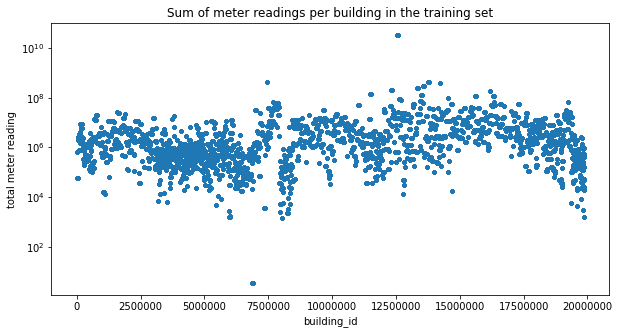

In [ ]:

# Make the plot.

plt.ticklabel_format(style = 'plain')
tot_meter_per_bldng.meter_reading_y.plot(logy=True, style='.', 
                                         title= "Sum of meter readings per building in the training set", 
                                         xlabel = 'building_id',
                                         ylabel= 'total meter reading',
                                         figsize = (10,5)
                                          )
plt.show()



We notice that most buildings have a total meter reading between 104
to 108, but the minimum and maximum are rather far away from the rest. We will extract their building ID and note them down.



It is clear that both of these buildings do not conform to the average Education load profiles.Building 740  has near-zero, perfectly flat energy use throughout the year, which doesn't   make  sense(Both are education buildings.). We will therefore drop these two buildings 


In [ ]:

min_id   = tot_meter_per_bldng.meter_reading_y.sort_values(ascending=True).index[0]
max_id = tot_meter_per_bldng.meter_reading_y.sort_values(ascending=True).index[-1]
tot_meter_per_bldng[(tot_meter_per_bldng.index==min_id) | (tot_meter_per_bldng.index ==max_id)]

In [ ]:
train_m.shape

In [ ]:
#RUN THIS ONLY

train_m.drop(train_m[(train_m["building_id"]==740)|(train_m["building_id"]==1099)].index, axis=0,inplace=True)

In [ ]:
def drop_outliers(data):
    #UNCOMMENT THIS
  #train_m.drop(train_m[(train_m["site_id"]==0) & (train_m["timestamp"]< "2016-05-20 00:00:00")  &(train_m["meter"]==0) ].index, inplace=True)

  data.drop(data[(data["building_id"]==740)|(data["building_id"]==1099)].index, axis=0,inplace=True)

In [ ]:
drop_outliers(train_m)

In [ ]:
train_m.shape

(19843638, 20)

# Putting it all together: Data preparation Pipeline

Let's build a pipeline that summarizes all the previous data preparation steps

In [ ]:
weather = pd.read_csv('/content/weather_train.csv.zip')
metre = pd.read_csv('/content/train.csv.zip')
building = pd.read_csv('/content/building_metadata.csv')

In [ ]:
def  data_pipeline():
      weather_f = fill_na_num_weather(weather)
      train = merge(metre, building, weather_f)
      train = reduce_mem_usage(train)
      add_cols(train)
      train = reduce_mem_usage(train)
      fill_na_merged(train)
      convert_units(train)
      train = reduce_mem_usage(train)
      
      train.drop([ "meter_reading", "timestamp"], axis=1,inplace=True)   ##
      return train

In [ ]:
train =data_pipeline()

Mem. usage decreased to 1002.54 Mb (59.4% reduction)
Mem. usage decreased to 1098.94 Mb (41.8% reduction)
   building_id  meter  timestamp  ...  day_of_year  is_weekend part_of_day
0            0      0 2016-01-01  ...            0           0           1
1            1      0 2016-01-01  ...            0           0           1
2            2      0 2016-01-01  ...            0           0           1
3            3      0 2016-01-01  ...            0           0           1
4            4      0 2016-01-01  ...            0           0           1

[5 rows x 20 columns]
building_id           0.0
meter                 0.0
timestamp             0.0
meter_reading         0.0
site_id               0.0
primary_use           0.0
square_feet           0.0
air_temperature       0.0
cloud_coverage        0.0
dew_temperature       0.0
precip_depth_1_hr     0.0
sea_level_pressure    0.0
wind_direction        0.0
wind_speed            0.0
day                   0.0
hour                  0.0
month

# Preparing    data for  ML models

In [ ]:

drive.mount("/content/colab/")

Mounted at /content/colab/


In [ ]:
!ls "colab/MyDrive/ML_Project"


train_m_preprocessed.p


In [ ]:
import pickle
#y  = np.log1p(train_m['meter_reading'])
train_m = pickle.load( open('colab/MyDrive/ML_Project/train_m_preprocessed.p', 'rb')) #load back in the train data


### log the o/p variable

In [ ]:
y  = np.log1p(train_m['meter_reading'])

In [ ]:
# #MUST
train_m.drop([ "meter_reading", "timestamp"], axis=1,inplace=True)

In [ ]:
train_m = reduce_mem_usage(train_m)

Mem. usage decreased to 851.60 Mb (48.3% reduction)


In [ ]:
train_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19843638 entries, 3360 to 20216099
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   building_id         int16  
 1   meter               int8   
 2   site_id             int8   
 3   primary_use         object 
 4   square_feet         int32  
 5   air_temperature     float16
 6   cloud_coverage      float16
 7   dew_temperature     float16
 8   precip_depth_1_hr   float16
 9   sea_level_pressure  float16
 10  wind_direction      float16
 11  wind_speed          float16
 12  day                 int8   
 13  hour                int8   
 14  month               int8   
 15  day_of_year         int16  
 16  is_weekend          int8   
 17  part_of_day         int8   
dtypes: float16(7), int16(2), int32(1), int8(7), object(1)
memory usage: 851.6+ MB


In [ ]:
train_m.drop(['sea_level_pressure','building_id'],axis=1,inplace=True)

In [ ]:

#train_m.drop(['cloud_coverage'],axis=1,inplace=True)

# Models

## 1.Decision  tree regressor

Decision tree is a type of supervised learning algorithm that works for both categorical and continuous input and output variables. In this technique, we split the population or sample into two or more homogeneous sets (or sub-populations) based on most significant splitter / differentiator in input variables. Decision trees are easy to understand, require relatively little effort from users for data preparation.

required preprocessing: categorical only

In [ ]:
train_m.head()

,building_id,meter,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,day,hour,month,day_of_year,is_weekend,part_of_day
3360,0,0,0,Education,7432,26.093750,6.0,22.796875,-1.0,1014.5,120.0,2.099609,20,0,5,140,0,1
3361,0,0,0,Education,7432,25.000000,6.0,20.593750,13.0,1016.0,140.0,1.500000,20,1,5,140,0,1
3362,0,0,0,Education,7432,22.796875,6.0,21.093750,0.0,1016.0,160.0,3.099609,20,2,5,140,0,1
3363,0,0,0,Education,7432,22.796875,4.0,21.093750,0.0,1017.5,190.0,3.099609,20,3,5,140,0,1
3364,0,0,0,Education,7432,22.796875,4.0,21.093750,0.0,1018.0,0.0,0.000000,20,4,5,140,0,2


In [ ]:
#Encode categorical variable 

le =preprocessing.LabelEncoder()
le = le.fit(train_m['primary_use'])
train_m['primary_use'] = le.transform(train_m['primary_use'])

In [ ]:
train_m.head()

,meter,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,day,hour,month,day_of_year,is_weekend,part_of_day
3360,0,0,0,7432,26.093750,22.796875,-1.0,1014.5,120.0,2.099609,20,0,5,140,0,1
3361,0,0,0,7432,25.000000,20.593750,13.0,1016.0,140.0,1.500000,20,1,5,140,0,1
3362,0,0,0,7432,22.796875,21.093750,0.0,1016.0,160.0,3.099609,20,2,5,140,0,1
3363,0,0,0,7432,22.796875,21.093750,0.0,1017.5,190.0,3.099609,20,3,5,140,0,1
3364,0,0,0,7432,22.796875,21.093750,0.0,1018.0,0.0,0.000000,20,4,5,140,0,2


In [ ]:
#divide training and test data
xtrain, xval, ytrain, yval = train_test_split(train_m, y, test_size=0.3, random_state=42)

In [ ]:
train_m.head()

,building_id,meter,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,day,hour,month,day_of_year,is_weekend,part_of_day
3360,0,0,0,0,7432,26.093750,6.0,22.796875,-1.0,1014.5,120.0,2.099609,20,0,5,140,0,1
3361,0,0,0,0,7432,25.000000,6.0,20.593750,13.0,1016.0,140.0,1.500000,20,1,5,140,0,1
3362,0,0,0,0,7432,22.796875,6.0,21.093750,0.0,1016.0,160.0,3.099609,20,2,5,140,0,1
3363,0,0,0,0,7432,22.796875,4.0,21.093750,0.0,1017.5,190.0,3.099609,20,3,5,140,0,1
3364,0,0,0,0,7432,22.796875,4.0,21.093750,0.0,1018.0,0.0,0.000000,20,4,5,140,0,2


In [ ]:
del train_m

In [ ]:
#xtrain.drop(['wind_direction','precip_depth_1_hr'],axis=1,inplace=True)
#xval.drop(['wind_direction','precip_depth_1_hr'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
xtrain.head()

,meter,site_id,primary_use,square_feet,air_temperature,dew_temperature,wind_speed,day,hour,month,day_of_year,is_weekend,part_of_day
4762523,0,3,0,69600,6.699219,5.601562,3.099609,16,8,1,15,1,3
2188977,0,2,10,1629,13.296875,11.703125,1.500000,23,6,12,357,0,2
13204785,0,13,4,230747,23.296875,19.406250,3.099609,20,8,6,171,0,3
8858679,3,7,0,387500,-11.000000,-13.601562,5.699219,20,5,1,19,0,2
19580940,0,15,4,96336,-8.296875,-15.601562,10.296875,18,17,1,17,0,5


In [ ]:


model = DecisionTreeRegressor(max_depth=30)
model.fit(xtrain, ytrain)
# This takes around ... minutes to run

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=30,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
#Compute the RMSLE

def RMSLE(pred,actual):
  return np.sqrt(np.sum(np.log(pred+1) - np.log(actual + 1))**2/len(actual))

In [ ]:
ypred = model.predict(xtrain)

In [ ]:
ytrain.head()

4762523     3.957570
2188977     0.783902
13204785    4.499810
8858679     8.092539
19580940    2.769459
Name: meter_reading, dtype: float64

In [ ]:
ypred[1]

0.7839015699564725

In [ ]:
# calculating MSE cuz it's more interpretable
print('Mean Squared Error for train:', mean_squared_error(ytrain,ypred))

Mean Squared Error: 0.045849506500902706


In [ ]:
ypred_val = model.predict(xval)

In [ ]:
print('Mean Squared Error for val:', mean_squared_error(yval,ypred_val))

Mean Squared Error for val: 0.39271767864416923


On average, the model predicts the meter reading with +- 0.39 KWH

Text(0, 0.5, 'Predicted meter reading')

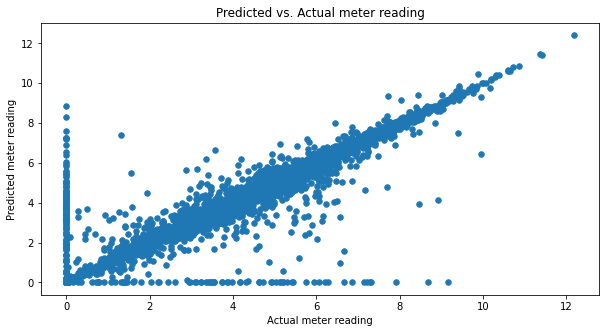

In [ ]:

plt.figure(figsize=(10, 5))
plt.scatter(yval[0:10000], ypred_val[0:10000], s=30)
plt.title('Predicted vs. Actual meter reading')
plt.xlabel('Actual meter reading')
plt.ylabel('Predicted meter reading')

#plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)])
#plt.tight_layout()

Clearly, the model fails to predict 0 readings correctly>> **back to data cleaning**

In [ ]:
#evaluate on train data;  no log for y, variables; no cloud coverage
RMSLE_DT = RMSLE(ypred, ytrain)
RMSLE_DT


8.415610075339812

In [ ]:
#evaluate on train data;  no log for y, all variables
RMSLE_DT = RMSLE(ypred, ytrain)
RMSLE_DT


115.47106022825247

https://www.kaggle.com/carlolepelaars/understanding-the-metric-rmsle

In [ ]:
yval.head()

5465837      62.349998
3086121       2.810000
11849950    375.915985
16794220     70.968697
541203      180.852664
Name: meter_reading, dtype: float64

I tried dropping some variables but the error didn't change

In [ ]:
RMSLE_DT = RMSLE(ypred_val, yval)
RMSLE_DT

4.420563897983105

In [ ]:
RMSLE_DT

4.335609036917774

Is this a normal value for RMSLE? I don't think so .

### Try diff. max depth!>> draw the tree

### Evaluating on test data

### D.T Reg- Cross validation; k-fold

In [ ]:
# from sklearn.model_selection import cross_val_score
# dt_scores = cross_val_score(dt_fit, xtrain, ytrain, cv=5)
# print("mean cross validation score: {}".format(np.mean(dt_scores)))
# print("score without cv: {}".format(dt_fit.score(xtrain, ytrain)))

mean cross validation score: 0.9032910385372922
score without cv: 0.9893891870849932


In [ ]:
xtrain.head()

,meter,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,wind_direction,wind_speed,day,hour,month,day_of_year,is_weekend,part_of_day
4762523,0,3,0,69600,6.699219,8.000000,5.601562,-1.000000,350.0,3.099609,16,8,1,15,1,3
2188977,0,2,10,1629,13.296875,6.000000,11.703125,0.000000,210.0,1.500000,23,6,12,357,0,2
13204785,0,13,4,230747,23.296875,8.000000,19.406250,0.000000,330.0,3.099609,20,8,6,171,0,3
8858679,3,7,0,387500,-11.000000,2.242188,-13.601562,4.320312,280.0,5.699219,20,5,1,19,0,2
19580940,0,15,4,96336,-8.296875,2.000000,-15.601562,-1.000000,280.0,10.296875,18,17,1,17,0,5


In [ ]:

scores = cross_validate(model, xtrain, ytrain, cv=3,
                        scoring=("neg_root_mean_squared_error", "neg_mean_squared_log_error"),
                        return_train_score= True)

In [ ]:
print(scores['test_neg_root_mean_squared_error'])

[-0.66408326 -0.66306911 -0.6606813 ]


### DT- Random search

In [ ]:

model = DecisionTreeRegressor(max_depth=30)
distributions = dict(criterion = ["mse", "mae"],
                     min_samples_split= [ 20, 40], 
                     max_depth = [2, 6, 8],
                     min_samples_leaf=[20,40,100],
                     max_leaf_nodes= [5, 20, 100])
clf = RandomizedSearchCV(model, distributions, random_state=42)
search = clf.fit(xtrain, ytrain)
search.best_params_


**More than 30 minutes>> decrease num of param's**

### DT-Grid search

In [ ]:

parameters ={"criterion" : ["mse", "mae"],
                     "min_samples_split":[ 20, 40], 
                     "max_depth" : [2, 8]}
model = DecisionTreeRegressor()
clf = GridSearchCV(model, parameters)
clf.fit(xtrain, ytrain)


sorted(clf.cv_results_.keys())

KeyboardInterrupt: ignored

## 2. Linear regression

In [ ]:

train_m.corr()["meter_reading"].sort_values(ascending = False)

meter_reading         1.000000
square_feet           0.128625
meter                 0.077655
site_id               0.047013
building_id           0.043261
cloud_coverage        0.012345
sea_level_pressure    0.006329
wind_direction        0.005849
wind_speed            0.005640
part_of_day           0.003426
hour                  0.003388
precip_depth_1_hr     0.002318
day_of_year           0.001688
month                 0.001630
day                   0.000104
is_weekend           -0.004150
dew_temperature      -0.022305
air_temperature      -0.031970
Name: meter_reading, dtype: float64

In [ ]:

# Multicollinearity

#one of the linear regression's assumptions: there isn't colinearity between input features

cor_pairs = train_m.select_dtypes(exclude  = ["object"]).corr().unstack()
strong_pairs = cor_pairs[((cor_pairs) > 0.8) & ((cor_pairs) < 1.0)]
strong_pairs
# Here are variables that are contenders to be cut due to being close to perfectly correlated:

building_id  site_id        0.980445
site_id      building_id    0.980445
hour         part_of_day    0.986869
month        day_of_year    0.980618
day_of_year  month          0.980618
part_of_day  hour           0.986869
dtype: float64

In [ ]:
# For these variables, the best alternative would be to drop one of the highly correlated variables.
train_m.drop(["building_id",  "hour","day_of_year"], axis=1,  inplace=True)

In [ ]:
#droppigcorrelated  variables that was illustrated at the beginning of this notebook
train_m.drop(["cloud_coverage", "air_temperature"], axis=1, inplace=True)


In [ ]:
#droppigcorrelated  variables that was illustrated at the beginning of this notebook
#wind  speed is correlated with wind direction; dropping wind direction
train_m.drop(["wind_direction"], axis=1, inplace=True)


I'll use the SGD version of linear regression, because it's faster.

## SGDRegressor is
 a Linear model fitted by minimizing a regularized empirical loss with SGD

Some of the mainn differennces :

    SGD Regressor uses GD to find the parameters
    SGD regressor doesn't use MSE, because it needs to know the direction of the error in order to adjust the line properly.





Since the algorithm depends on Gradient descent, numerical features must be scaled.


### - Scaling
scaling numerical features is mandatory in NN's, 

In [ ]:
train_m.drop("timestamp", axis=1, inplace=True)

In [ ]:
#note that we need to save the mean and std of the train data, to use it in the pipeline when testing
#but we'll skip this now for saving memory
features_numeric = ["meter", "site_id", "square_feet", "dew_temperature", "precip_depth_1_hr", "sea_level_pressure", "wind_speed", "day", "month","is_weekend", "part_of_day"  ]
#note that we need to save the mean and std of the train data, to use it in the pipeline when testing
#but we'll skip this now for saving memory
features_numeric = ["meter", "site_id", "square_feet", "dew_temperature", "precip_depth_1_hr", "sea_level_pressure", "wind_speed", "day", "month","is_weekend", "part_of_day"  ]
scaler = StandardScaler().fit(train_m[features_numeric]) #.select_dtypes(include =  ["int64", "float64"])
x_scaled = scaler.transform(train_m[features_numeric])

In [ ]:
x_scaled[0]

array([-0.72091803, -1.61509357, -0.85844313,  1.48541958, -0.2829493 ,
       -0.22013357, -0.56178524,  0.47862244, -0.47981701, -0.63370479,
       -1.46423298])

In [ ]:
del  train_m

In [ ]:
x_scaled[0]

array([-0.72091803, -1.61509357, -0.85844313,  1.48541958, -0.2829493 ,
       -0.22013357, -0.56178524,  0.47862244, -0.47981701, -0.63370479,
       -1.46423298])

In [ ]:


xtrain, xval, ytrain, yval = train_test_split(x_scaled, y, test_size=0.5, random_state=42)

In [ ]:
# The default loss funnction is ‘squared_loss’, which refers to the ordinary least squares fit in Model 1. 
SGDreg   =  SGDRegressor(random_state = 42)
SGDreg.fit(xtrain, ytrain.ravel())
y_pred=SGDreg.predict(xval)

In [ ]:

print(' Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yval, (y_pred))))
print(' Mean absolute Error:', np.sqrt(metrics.mean_squared_error(yval, (y_pred))))

 Mean Squared Error: 1.9128682940413277
 Mean absolute Error: 1.9128682940413277


In [ ]:
print(' Root Mean Squared Log Error:', RMSLE(y_pred, yval))

 Root Mean Squared Log Error: 357.89915493163886


Text(0, 0.5, 'Predicted meter reading')

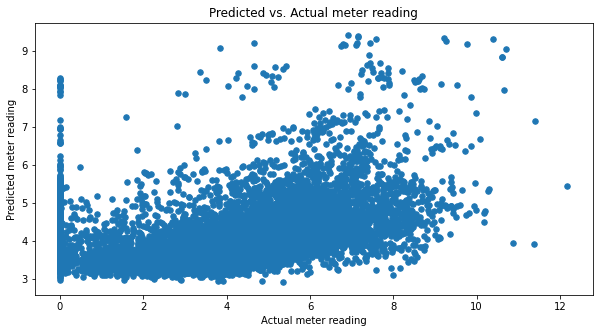

In [ ]:

plt.figure(figsize=(10, 5))
plt.scatter(yval[0:10000], y_pred[0:10000], s=30)
plt.title('Predicted vs. Actual meter reading')
plt.xlabel('Actual meter reading')
plt.ylabel('Predicted meter reading')

#plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)])
#plt.tight_layout()

SGD regressor performed alot worse than DT regressor. This could be due to the followig reason:
 input variables aren't strongly correlated with the target variable; the model failed to find a   linear  seperator

Time: 

## 3. Neural Network


Artificial Neural Network consists of inputs, hidden layers, activation funtion, bias and output. Each connection is weighted by previous learning events and with each new input of data more learning takes place. ANNs have the ability to learn and model non-linear and complex relationships. It can generalize and it doesn't impose restrictions on the input

In [ ]:
train_m

,meter,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,wind_direction,wind_speed,day,hour,month,day_of_year,is_weekend,part_of_day
3360,0,0,Education,7432,26.093750,22.796875,-1.0,120.0,2.099609,20,0,5,140,0,1
3361,0,0,Education,7432,25.000000,20.593750,13.0,140.0,1.500000,20,1,5,140,0,1
3362,0,0,Education,7432,22.796875,21.093750,0.0,160.0,3.099609,20,2,5,140,0,1
3363,0,0,Education,7432,22.796875,21.093750,0.0,190.0,3.099609,20,3,5,140,0,1
3364,0,0,Education,7432,22.796875,21.093750,0.0,0.0,0.000000,20,4,5,140,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,0,15,Office,92271,3.000000,-8.000000,-1.0,180.0,5.699219,31,19,12,0,1,5
20216096,0,15,Office,92271,2.800781,-8.898438,-1.0,180.0,7.699219,31,20,12,0,1,6
20216097,0,15,Office,92271,2.800781,-7.199219,-1.0,180.0,5.101562,31,21,12,0,1,6
20216098,0,15,Office,92271,2.199219,-6.699219,-1.0,170.0,4.601562,31,22,12,0,1,6


In [ ]:

#note that we need to save the mean and std of the train data, to use it in the pipeline when testing
#but we'll skip this now for saving memory
features_numeric = ["meter", "site_id", "square_feet", "dew_temperature", "precip_depth_1_hr", "wind_speed","wind_direction", "day", "hour","month", "day_of_year","is_weekend", "part_of_day"  ]
scaler = StandardScaler().fit(train_m[features_numeric]) #.select_dtypes(include =  ["int64", "float64"])
x_scaled = scaler.transform(train_m[features_numeric])

In [ ]:
x_scaled.shape

(19843638, 13)

In [ ]:
def RMSLE_(pred,act): 
    return K.sqrt(K.mean(K.square(pred - act),axis = 0))

In [ ]:

model = Sequential()
model.add(Dense(128, input_shape = (13, ), activation = "relu", name = "fc1"))
model.add(Dense(64, activation="relu"), name = "fc2")
model.add(Dense(32, activation="relu"), name = "fc3")
model.add(Dense(16, activation="relu"), name = "fc4")
model.add(Dense(1, activation="linear"), name = "output")

optimizer = Adam(lr = 0.001)
model.compile(optimizer, loss = ["mean_squared_error"], metrics = [RMSLE_model])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 128)               1792      
_________________________________________________________________
fc2 (Dense)                  (None, 64)                8256      
_________________________________________________________________
fc3 (Dense)                  (None, 32)                2080      
_________________________________________________________________
fc4 (Dense)                  (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#split
xtrain, xval, ytrain, yval = train_test_split(x_scaled, y, test_size=0.5, random_state=42)

In [ ]:
xtrain.shape

(9921819, 13)

In [ ]:
history = model.fit(xtrain,ytrain,validation_data=(xval, yval),verbose=2, batch_size = 3000, epochs = 20)
model.save("Model_20.h5") 

Epoch 1/20
3308/3308 - 17s - loss: 2.6788 - RMSLE_model: 1.6234 - val_loss: 2.3733 - val_RMSLE_model: 1.5403
Epoch 2/20
3308/3308 - 13s - loss: 2.2784 - RMSLE_model: 1.5090 - val_loss: 2.1708 - val_RMSLE_model: 1.4731
Epoch 3/20
3308/3308 - 13s - loss: 2.1013 - RMSLE_model: 1.4492 - val_loss: 2.0700 - val_RMSLE_model: 1.4384
Epoch 4/20
3308/3308 - 13s - loss: 2.0364 - RMSLE_model: 1.4266 - val_loss: 2.0217 - val_RMSLE_model: 1.4215
Epoch 5/20
3308/3308 - 13s - loss: 1.9991 - RMSLE_model: 1.4136 - val_loss: 1.9907 - val_RMSLE_model: 1.4106
Epoch 6/20
3308/3308 - 13s - loss: 1.9698 - RMSLE_model: 1.4031 - val_loss: 1.9572 - val_RMSLE_model: 1.3987
Epoch 7/20
3308/3308 - 13s - loss: 1.9446 - RMSLE_model: 1.3941 - val_loss: 1.9409 - val_RMSLE_model: 1.3928
Epoch 8/20
3308/3308 - 13s - loss: 1.9208 - RMSLE_model: 1.3856 - val_loss: 1.9167 - val_RMSLE_model: 1.3841
Epoch 9/20
3308/3308 - 13s - loss: 1.8975 - RMSLE_model: 1.3772 - val_loss: 1.9015 - val_RMSLE_model: 1.3786
Epoch 10/20
3308/33

In [ ]:
model.load_weights("Model_20.h5") 

In [ ]:
xval

In [ ]:
ypred_val = model.evaluate(xval, yval, batch_size = 3000)
#Returns the loss value & metrics values for the model in test mode

310057/310057 [==============================] - 513s 2ms/step - loss: 0.0000e+00 - RMSLE_model: 0.0000e+00


In [ ]:
len(ypred_val)

2

In [ ]:
predictions = model.predict(xval)

In [ ]:
predictions.shape

(9921819, 1)

In [ ]:
yval.shape

(9921819,)

In [ ]:
del   train_m

In [ ]:

RMSLE_NN=RMSLE_(predictions,yval)
RMSLE_NN

Text(0, 0.5, 'Predicted meter reading')

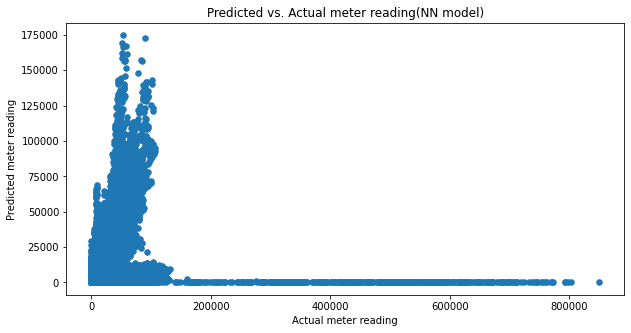

In [ ]:

plt.figure(figsize=(10, 5))
plt.scatter(np.expm1(yval), np.expm1(predictions), s=30)
plt.title('Predicted vs. Actual meter reading(NN model)')
plt.xlabel('Actual meter reading')
plt.ylabel('Predicted meter reading')

#plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)])
#plt.tight_layout()

Clearly,  the network predicts 0's when it shouldn't, and fails to predict large numbers. This is expected since we trained on a small number of epochs; better results could be achieved if we increased the number of epochs.

### Visualizing val. loss: does the model overfit?

In [ ]:

train_loss =     history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(range(5,200),  train_loss[5:200],  "bo", label = "Trainninng   loss")
plt.plot(range(5,200), val_loss[5:200], "b", label =  "val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Model Ensembles

## 1.xgoost

In [ ]:
train_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19843638 entries, 3360 to 20216099
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   building_id         int16  
 1   meter               int8   
 2   site_id             int8   
 3   primary_use         int64  
 4   square_feet         int32  
 5   air_temperature     float16
 6   cloud_coverage      float16
 7   dew_temperature     float16
 8   precip_depth_1_hr   float16
 9   sea_level_pressure  float16
 10  wind_direction      float16
 11  wind_speed          float16
 12  day                 int8   
 13  hour                int8   
 14  month               int8   
 15  day_of_year         int16  
 16  is_weekend          int8   
 17  part_of_day         int8   
dtypes: float16(7), int16(2), int32(1), int64(1), int8(7)
memory usage: 851.6 MB


In [ ]:
#note that we need to save the mean and std of the train data, to use it in the pipeline when testing
#but we'll skip this now for saving memory
features_numeric=[ 'square_feet',"meter",'air_temperature',"cloud_coverage", 'dew_temperature', 'precip_depth_1_hr',  'wind_direction', 'wind_speed',"day","hour","month","day_of_year","is_weekend","part_of_day"]

#note that we need to save the mean and std of the train data, to use it in the pipeline when testing
#but we'll skip this now for saving memory
scaler = StandardScaler().fit(train_m[features_numeric]) #.select_dtypes(include =  ["int64", "float64"])
x_scaled = scaler.transform(train_m[features_numeric])

In [ ]:
x_scaled.shape

(19843638, 14)

In [ ]:
import xgboost
from sklearn.metrics import mean_squared_error

In [ ]:
if xgboost is not None:  # not shown in the book
    xgb_reg = xgboost.XGBRegressor(random_state=42)
    xgb_reg.fit(xtrain, ytrain)
    y_pred = np.expm1(xgb_reg.predict(xval))
    val_error = mean_squared_error(yval, y_pred)
    print("Validation MSE:", val_error)

[20:46:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:46:20] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
Validation MSE: 90718.04865523447


In [ ]:
pickle.dump( xgb_reg, open( "colab/MyDrive/ML_Project1/xgb_reg.sav", "wb" ) )

## 2.GradientBoostingRegressor

In [ ]:


#this cell was executed after the  pipeline section: Building the  pipeline.Please make sure to run   the code there first
num_attribs = list(train_m.drop("primary_use", axis=1))
cat_attribs = ["primary_use"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

train_prepared = full_pipeline.fit_transform(train_m)

In [ ]:
train_prepared.shape

(19843638, 18)

In [ ]:
del train_m

In [ ]:
#divide training and test data
xtrain, xval, ytrain, yval = train_test_split(train_prepared, y, test_size=0.3, random_state=42)

In [ ]:
del train_prepared

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(yval, Y_predict)
print('MAE: %.4f' % mae)

MAE: 406.2778


In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(yval, Y_predict))

18968271.13644731


find the best number of trees

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(xtrain, ytrain)

errors = [mean_squared_error(yval, y_pred)
          for y_pred in gbrt.staged_predict(xval)]
bst_n_estimators = np.argmin(errors) + 1
print(bst_n_estimators)

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(xtrain, ytrain)

120


In [ ]:
Y_predict= np.expm1(gbrt_best.predict(xval))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in expm1
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(yval, Y_predict))

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(yval, Y_predict)
print('MAE: %.4f' % mae)

In [ ]:
min_error = np.min(errors)

In [ ]:
min_error

In [ ]:
pickle.dump( gbrt_best, open( "/content/drive/MyDrive/ML_Project/gbrt.sav", "wb" ) )


In [ ]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(xtrain, ytrain)
    y_pred = gbrt.predict(xval)
    val_error = mean_squared_error(yval, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

In [ ]:
print("Minimum validation MSE:", min_val_error)

## 3. RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rnd_clf = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(xtrain, ytrain)

y_pred_rf = np.expm1(rnd_clf.predict(xval))

In [ ]:
val_error = mean_squared_error(yval, y_pred_rf)
print("Validation MSE:", val_error)

In [ ]:
pickle.dump( rnd_clf, open( "/content/drive/MyDrive/ML_Project/rnd_clf.sav", "wb" ) )


# Building the pipeline

Now let's build a pipeline for preprocessing the numerical attributes:

In [ ]:
train_m.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,day,hour,month,day_of_year,is_weekend,part_of_day
3360,0,0,2016-05-20 00:00:00,0.0,0,Education,7432,26.093750,6.0,22.796875,-1.0,1014.5,120.0,2.099609,20,0,5,140,0,1
3361,0,0,2016-05-20 01:00:00,0.0,0,Education,7432,25.000000,6.0,20.593750,13.0,1016.0,140.0,1.500000,20,1,5,140,0,1
3362,0,0,2016-05-20 02:00:00,0.0,0,Education,7432,22.796875,6.0,21.093750,0.0,1016.0,160.0,3.099609,20,2,5,140,0,1
3363,0,0,2016-05-20 03:00:00,0.0,0,Education,7432,22.796875,4.0,21.093750,0.0,1017.5,190.0,3.099609,20,3,5,140,0,1
3364,0,0,2016-05-20 04:00:00,0.0,0,Education,7432,22.796875,4.0,21.093750,0.0,1018.0,0.0,0.000000,20,4,5,140,0,2


In [ ]:

#
num_pipeline = Pipeline([
                         ("std_scaler", StandardScaler())
])


In [ ]:

cat_pipeline = Pipeline([
                         ("ord_encoder", OrdinalEncoder())
])


In [ ]:
train_num_tr = num_pipeline.fit_transform(train_num)

In [ ]:
train_num_tr

array([[-1.93745195, -0.72091803, -1.61509357, ..., -0.43293997,
        -0.63370479, -1.46423298],
       [-1.93745195, -0.72091803, -1.61509357, ..., -0.43293997,
        -0.63370479, -1.46423298],
       [-1.93745195, -0.72091803, -1.61509357, ..., -0.43293997,
        -0.63370479, -1.46423298],
       ...,
       [ 1.51721784, -0.72091803,  1.36532492, ..., -1.76670408,
         1.57802184,  1.46355387],
       [ 1.51721784, -0.72091803,  1.36532492, ..., -1.76670408,
         1.57802184,  1.46355387],
       [ 1.51721784, -0.72091803,  1.36532492, ..., -1.76670408,
         1.57802184,  1.46355387]])

In [ ]:
train_m.head()

,building_id,meter,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,day,hour,month,day_of_year,is_weekend,part_of_day
3360,0,0,0,Education,7432,26.093750,6.0,22.796875,-1.0,1014.5,120.0,2.099609,20,0,5,140,0,1
3361,0,0,0,Education,7432,25.000000,6.0,20.593750,13.0,1016.0,140.0,1.500000,20,1,5,140,0,1
3362,0,0,0,Education,7432,22.796875,6.0,21.093750,0.0,1016.0,160.0,3.099609,20,2,5,140,0,1
3363,0,0,0,Education,7432,22.796875,4.0,21.093750,0.0,1017.5,190.0,3.099609,20,3,5,140,0,1
3364,0,0,0,Education,7432,22.796875,4.0,21.093750,0.0,1018.0,0.0,0.000000,20,4,5,140,0,2


In [ ]:
list(train_m.drop("primary_use", axis=1))

['building_id',
 'meter',
 'site_id',
 'square_feet',
 'air_temperature',
 'cloud_coverage',
 'dew_temperature',
 'precip_depth_1_hr',
 'sea_level_pressure',
 'wind_direction',
 'wind_speed',
 'day',
 'hour',
 'month',
 'day_of_year',
 'is_weekend',
 'part_of_day']

In [ ]:


#
num_attribs = list(train_m.drop("primary_use", axis=1))
cat_attribs = ["primary_use"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

train_prepared = full_pipeline.fit_transform(train_m)

In [ ]:
train_prepared[0]

array([-1.93745195, -0.72091803, -1.61509357, -0.85844313,  0.92681051,
        1.17548745,  1.48541958, -0.2829493 , -0.22013357, -0.44578529,
       -0.56178524,  0.47862244, -1.66170851, -0.47981701, -0.43293997,
       -0.63370479, -1.46423298,  0.        ])

In [ ]:
submission = pd.read_csv('sample_submission.csv')
submission['meter_reading'] = res
submission.loc[submission['meter_reading']<0, 'meter_reading'] = 0
submission.to_csv('my_submission1.csv', index=False)
submission